In [1]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-fyrd46uj
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-fyrd46uj
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-ksw7gkxu/pyfolio_4dce0f5330d14fc88afcb35853a9c52a
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-ksw7gkxu/pyfolio_4dce0f5330d14fc88afcb35853a9c52a
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-ksw7gkxu/elegantrl_85703e2b1ce346658ab7ce3763f73572
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-ksw7gkxu/elegantrl_85703e2b1ce346658ab7ce3763f73572
     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 174 kB 8.2 MB/s 
     |████████████████████████████████| 57.6 MB 1.7 kB/s 
     |████████████████████████████████| 1.8 MB 34.4 MB/s 
     |███████

In [2]:
!pip install yahoo-finance
!pip install stockstats
!pip install gym
!pip install stable-baselines
!pip install tensorflow==1.14
!pip install pyfolio

     |████████████████████████████████| 130 kB 5.4 MB/s 
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7231 sha256=439e5f622d3abbe2c005a69992b9664c2e6f7ed3894128c8bd36297ede109d2d
  Stored in directory: /root/.cache/pip/wheels/74/3c/6e/504622cec9991612b9e3945fe8b375fef727854b42eb333c91
Successfully built yahoo-finance
     |████████████████████████████████| 240 kB 5.3 MB/s 
     |████████████████████████████████| 109.3 MB 44 kB/s 
     |████████████████████████████████| 3.1 MB 43.1 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 488 kB 41.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uni

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.apps import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [5]:
# from config.py start_date is a string
config.START_DATE

'2009-01-01'

In [6]:
# from config.py end_date is a string
config.END_DATE

'2021-10-31'

In [7]:
print(config.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [8]:
df = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2021-01-01',
                     ticker_list = config.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.778781,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,45.615871,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.618538,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941105,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,32.475796,7117200,CAT,4


In [10]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [11]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.778781,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,45.615871,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.618538,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941105,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,32.475796,7117200,CAT,4


In [12]:
# Import fundamental data from my GitHub repository
url = 'https://raw.githubusercontent.com/mariko-sawada/FinRL_with_fundamental_data/main/dow_30_fundamental_wrds.csv'

fund = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Check the imported dataset
fund.head()

,gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,conm,acctchgq,acctstdq,adrrq,ajexq,ajpq,bsprq,compstq,curcdq,curncdq,currtrq,curuscnq,datacqtr,datafqtr,finalq,ogmq,rp,scfq,srcq,staltq,updq,apdedateq,fdateq,pdateq,rdq,acchgq,acomincq,acoq,actq,altoq,...,uspiy,ustdncy,usubdvpy,utfdocy,utfoscy,utmey,uwkcapcy,wcapchy,wcapcy,wday,wddy,wdepsy,wdpy,xidocy,xidoy,xinty,xiy,xopry,xoptdqpy,xoptdy,xoptepsqpy,xoptepsy,xoptqpy,xopty,xrdy,xsgay,exchg,costat,cshtrq,dvpspq,dvpsxq,mkvaltq,prccq,prchq,prclq,adjex,ggroup,gind,gsector,gsubind
0,1447,19990630,1999,2,12,INDL,C,D,STD,AXP,AMERICAN EXPRESS CO,NaN,NaN,NaN,3.0,3.0,GB,NaN,USD,USD,1.0,NaN,1999Q2,1999Q2,Y,NaN,Q,7.0,5,NaN,3,NaN,NaN,NaN,19990726.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,9125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,A,106125400.0,0.225,0.225,NaN,130.1250,142.6250,114.5000,3.0,4020,402020,40,40202010
1,1447,19990930,1999,3,12,INDL,C,D,STD,AXP,AMERICAN EXPRESS CO,NaN,NaN,NaN,3.0,3.0,GB,NaN,USD,USD,1.0,NaN,1999Q3,1999Q3,Y,NaN,Q,7.0,5,NaN,3,NaN,NaN,NaN,19991025.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,13803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,A,121724600.0,0.225,0.000,NaN,135.0000,150.6250,121.8750,3.0,4020,402020,40,40202010
2,1447,19991231,1999,4,12,INDL,C,D,STD,AXP,AMERICAN EXPRESS CO,NaN,NaN,NaN,3.0,3.0,GB,NaN,USD,USD,1.0,NaN,1999Q4,1999Q4,Y,NaN,Q,7.0,53,NaN,3,NaN,NaN,NaN,20000124.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,18967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,A,126218100.0,0.225,0.225,NaN,166.2500,168.8750,130.2500,3.0,4020,402020,40,40202010
3,1447,20000331,2000,1,12,INDL,C,D,STD,AXP,AMERICAN EXPRESS CO,NaN,NaN,NaN,3.0,3.0,GB,NaN,USD,USD,1.0,NaN,2000Q1,2000Q1,Y,NaN,Q,7.0,5,NaN,3,NaN,NaN,NaN,20000424.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,A,167224700.0,0.225,0.225,NaN,148.9375,169.5000,119.5000,3.0,4020,402020,40,40202010
4,1447,20000630,2000,2,12,INDL,C,D,STD,AXP,AMERICAN EXPRESS CO,NaN,NaN,NaN,1.0,1.0,GB,NaN,USD,USD,1.0,NaN,2000Q2,2000Q2,Y,NaN,Q,7.0,5,NaN,3,NaN,NaN,NaN,20000724.0,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,10425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,A,325319600.0,0.080,0.080,NaN,52.1250,57.1875,43.9375,1.0,4020,402020,40,40202010


In [14]:
# List items that are used to calculate financial ratios

items = [
    'datadate', # Date
    'tic', # Ticker
    'oiadpq', # Quarterly operating income
    'revtq', # Quartely revenue
    'niq', # Quartely net income
    'atq', # Total asset
    'teqq', # Shareholder's equity
    'epspiy', # EPS(Basic) incl. Extraordinary items
    'ceqq', # Common Equity
    'cshoq', # Common Shares Outstanding
    'dvpspq', # Dividends per share
    'actq', # Current assets
    'lctq', # Current liabilities
    'cheq', # Cash & Equivalent
    'rectq', # Recievalbles
    'cogsq', # Cost of  Goods Sold
    'invtq', # Inventories
    'apq',# Account payable
    'dlttq', # Long term debt
    'dlcq', # Debt in current liabilites
    'ltq' # Liabilities   
]

# Omit items that will not be used
fund_data = fund[items]

In [15]:
# Rename column names for the sake of readability
fund_data = fund_data.rename(columns={
    'datadate':'date', # Date
    'oiadpq':'op_inc_q', # Quarterly operating income
    'revtq':'rev_q', # Quartely revenue
    'niq':'net_inc_q', # Quartely net income
    'atq':'tot_assets', # Assets
    'teqq':'sh_equity', # Shareholder's equity
    'epspiy':'eps_incl_ex', # EPS(Basic) incl. Extraordinary items
    'ceqq':'com_eq', # Common Equity
    'cshoq':'sh_outstanding', # Common Shares Outstanding
    'dvpspq':'div_per_sh', # Dividends per share
    'actq':'cur_assets', # Current assets
    'lctq':'cur_liabilities', # Current liabilities
    'cheq':'cash_eq', # Cash & Equivalent
    'rectq':'receivables', # Receivalbles
    'cogsq':'cogs_q', # Cost of  Goods Sold
    'invtq':'inventories', # Inventories
    'apq': 'payables',# Account payable
    'dlttq':'long_debt', # Long term debt
    'dlcq':'short_debt', # Debt in current liabilites
    'ltq':'tot_liabilities' # Liabilities   
})

In [16]:
# Check the data
fund_data.head()

,date,tic,op_inc_q,rev_q,net_inc_q,tot_assets,sh_equity,eps_incl_ex,com_eq,sh_outstanding,div_per_sh,cur_assets,cur_liabilities,cash_eq,receivables,cogs_q,inventories,payables,long_debt,short_debt,tot_liabilities
0,19990630,AXP,896.0,5564.0,646.0,132452.0,9762.0,2.73,9762.0,449.0,0.225,NaN,NaN,6096.0,46774.0,4668.0,448.0,22282.0,7005.0,24785.0,122690.0
1,19990930,AXP,906.0,5584.0,648.0,132616.0,9744.0,4.18,9744.0,447.6,0.225,NaN,NaN,5102.0,48827.0,4678.0,284.0,23587.0,6720.0,24683.0,122872.0
2,19991231,AXP,845.0,6009.0,606.0,148517.0,10095.0,5.54,10095.0,446.9,0.225,NaN,NaN,10391.0,54033.0,5164.0,277.0,25719.0,4685.0,32437.0,138422.0
3,20000331,AXP,920.0,6021.0,656.0,150662.0,10253.0,1.48,10253.0,444.7,0.225,NaN,NaN,7425.0,53663.0,5101.0,315.0,26379.0,5670.0,29342.0,140409.0
4,20000630,AXP,1046.0,6370.0,740.0,148553.0,10509.0,1.05,10509.0,1333.0,0.080,NaN,NaN,6841.0,54286.0,5324.0,261.0,29536.0,5336.0,26170.0,138044.0


In [17]:
# Calculate financial ratios
date = pd.to_datetime(fund_data['date'],format='%Y%m%d')

tic = fund_data['tic'].to_frame('tic')

# Profitability ratios
# Operating Margin
OPM = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='OPM')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        OPM[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        OPM.iloc[i] = np.nan
    else:
        OPM.iloc[i] = np.sum(fund_data['op_inc_q'].iloc[i-3:i])/np.sum(fund_data['rev_q'].iloc[i-3:i])

# Net Profit Margin        
NPM = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='NPM')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        NPM[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        NPM.iloc[i] = np.nan
    else:
        NPM.iloc[i] = np.sum(fund_data['net_inc_q'].iloc[i-3:i])/np.sum(fund_data['rev_q'].iloc[i-3:i])

# Return On Assets
ROA = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='ROA')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        ROA[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        ROA.iloc[i] = np.nan
    else:
        ROA.iloc[i] = np.sum(fund_data['net_inc_q'].iloc[i-3:i])/fund_data['tot_assets'].iloc[i]

# Return on Equity
ROE = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='ROE')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        ROE[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        ROE.iloc[i] = np.nan
    else:
        ROE.iloc[i] = np.sum(fund_data['net_inc_q'].iloc[i-3:i])/fund_data['sh_equity'].iloc[i]        

# For calculating valuation ratios in the next subpart, calculate per share items in advance
# Earnings Per Share       
EPS = fund_data['eps_incl_ex'].to_frame('EPS')

# Book Per Share
BPS = (fund_data['com_eq']/fund_data['sh_outstanding']).to_frame('BPS') # Need to check units

#Dividend Per Share
DPS = fund_data['div_per_sh'].to_frame('DPS')

# Liquidity ratios
# Current ratio
cur_ratio = (fund_data['cur_assets']/fund_data['cur_liabilities']).to_frame('cur_ratio')

# Quick ratio
quick_ratio = ((fund_data['cash_eq'] + fund_data['receivables'] )/fund_data['cur_liabilities']).to_frame('quick_ratio')

# Cash ratio
cash_ratio = (fund_data['cash_eq']/fund_data['cur_liabilities']).to_frame('cash_ratio')


# Efficiency ratios
# Inventory turnover ratio
inv_turnover = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='inv_turnover')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        inv_turnover[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        inv_turnover.iloc[i] = np.nan
    else:
        inv_turnover.iloc[i] = np.sum(fund_data['cogs_q'].iloc[i-3:i])/fund_data['inventories'].iloc[i]

# Receivables turnover ratio       
acc_rec_turnover = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='acc_rec_turnover')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        acc_rec_turnover[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        acc_rec_turnover.iloc[i] = np.nan
    else:
        acc_rec_turnover.iloc[i] = np.sum(fund_data['rev_q'].iloc[i-3:i])/fund_data['receivables'].iloc[i]

# Payable turnover ratio
acc_pay_turnover = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='acc_pay_turnover')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        acc_pay_turnover[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        acc_pay_turnover.iloc[i] = np.nan
    else:
        acc_pay_turnover.iloc[i] = np.sum(fund_data['cogs_q'].iloc[i-3:i])/fund_data['payables'].iloc[i]
        
## Leverage financial ratios
# Debt ratio
debt_ratio = (fund_data['tot_liabilities']/fund_data['tot_assets']).to_frame('debt_ratio')

# Debt to Equity ratio
debt_to_equity = (fund_data['tot_liabilities']/fund_data['sh_equity']).to_frame('debt_to_equity')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars


In [18]:
# Create a dataframe that merges all the ratios
ratios = pd.concat([date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,
                    cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,
                   debt_ratio,debt_to_equity], axis=1)

In [19]:
# Check the ratio data
ratios.head()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
0,1999-06-30,AXP,NaN,NaN,NaN,NaN,2.73,21.741648,0.225,NaN,NaN,NaN,NaN,NaN,NaN,0.926298,12.568121
1,1999-09-30,AXP,NaN,NaN,NaN,NaN,4.18,21.769437,0.225,NaN,NaN,NaN,NaN,NaN,NaN,0.926525,12.610016
2,1999-12-31,AXP,NaN,NaN,NaN,NaN,5.54,22.588946,0.225,NaN,NaN,NaN,NaN,NaN,NaN,0.932028,13.711937
3,2000-03-31,AXP,0.154281,0.110742,0.012611,0.185312,1.48,23.055993,0.225,NaN,NaN,NaN,46.0635,0.319717,0.550059,0.931947,13.694431
4,2000-06-30,AXP,0.151641,0.108436,0.0128574,0.181749,1.05,7.883721,0.080,NaN,NaN,NaN,57.2529,0.324467,0.505925,0.929258,13.135788


In [20]:
ratios.tail()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
2451,2020-03-31,V,0.667517,0.521213,0.129058,0.271736,2.85,13.647142,0.30,1.248714,1.140070,0.955150,inf,6.11635,2.69754,0.525062,1.105537
2452,2020-06-30,V,0.668385,0.519867,0.120448,0.264075,3.92,14.203947,0.30,1.553478,1.443292,1.221925,inf,5.06313,1.88951,0.543886,1.192433
2453,2020-09-30,V,0.654464,0.52129,0.107873,0.241066,4.90,14.653484,0.30,1.905238,1.784838,1.579807,inf,5.62857,2.73037,0.552515,1.234714
2454,2020-12-31,V,0.638994,0.480876,0.0944222,0.201545,1.42,15.908283,0.32,2.121065,1.969814,1.700081,inf,4.72531,2.34787,0.531507,1.134505
2455,2021-03-31,V,0.640128,0.488704,0.0952179,0.202568,2.80,16.088525,0.32,2.116356,1.954292,1.700574,inf,4.84496,2.36736,0.529946,1.127414


In [21]:
# Replace NAs infinite values with zero
final_ratios = ratios.copy()
final_ratios = final_ratios.fillna(0)
final_ratios = final_ratios.replace(np.inf,0)

In [22]:
final_ratios.head()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
0,1999-06-30,AXP,0.000000,0.000000,0.000000,0.000000,2.73,21.741648,0.225,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.926298,12.568121
1,1999-09-30,AXP,0.000000,0.000000,0.000000,0.000000,4.18,21.769437,0.225,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.926525,12.610016
2,1999-12-31,AXP,0.000000,0.000000,0.000000,0.000000,5.54,22.588946,0.225,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.932028,13.711937
3,2000-03-31,AXP,0.154281,0.110742,0.012611,0.185312,1.48,23.055993,0.225,0.0,0.0,0.0,46.063492,0.319717,0.550059,0.931947,13.694431
4,2000-06-30,AXP,0.151641,0.108436,0.012857,0.181749,1.05,7.883721,0.080,0.0,0.0,0.0,57.252874,0.324467,0.505925,0.929258,13.135788


In [23]:
final_ratios.tail()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
2451,2020-03-31,V,0.667517,0.521213,0.129058,0.271736,2.85,13.647142,0.30,1.248714,1.140070,0.955150,0.0,6.116350,2.697537,0.525062,1.105537
2452,2020-06-30,V,0.668385,0.519867,0.120448,0.264075,3.92,14.203947,0.30,1.553478,1.443292,1.221925,0.0,5.063131,1.889507,0.543886,1.192433
2453,2020-09-30,V,0.654464,0.521290,0.107873,0.241066,4.90,14.653484,0.30,1.905238,1.784838,1.579807,0.0,5.628571,2.730366,0.552515,1.234714
2454,2020-12-31,V,0.638994,0.480876,0.094422,0.201545,1.42,15.908283,0.32,2.121065,1.969814,1.700081,0.0,4.725314,2.347866,0.531507,1.134505
2455,2021-03-31,V,0.640128,0.488704,0.095218,0.202568,2.80,16.088525,0.32,2.116356,1.954292,1.700574,0.0,4.844961,2.367357,0.529946,1.127414


In [24]:
list_ticker = df["tic"].unique().tolist()
list_date = list(pd.date_range(df['date'].min(),df['date'].max()))
combination = list(itertools.product(list_date,list_ticker))

# Merge stock price data and ratios into one dataframe
processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(df,on=["date","tic"],how="left")
processed_full = processed_full.merge(final_ratios,how='left',on=['date','tic'])
processed_full = processed_full.sort_values(['tic','date'])

# Backfill the ratio data to make them daily
processed_full = processed_full.bfill(axis='rows')

In [25]:
# Calculate P/E, P/B and dividend yield using daily closing price
processed_full['PE'] = processed_full['close']/processed_full['EPS']
processed_full['PB'] = processed_full['close']/processed_full['BPS']
processed_full['Div_yield'] = processed_full['DPS']/processed_full['close']

# Drop per share items used for the above calculation
processed_full = processed_full.drop(columns=['day','EPS','BPS','DPS'])

In [26]:
# Check the final data
processed_full = processed_full.sort_values(['date','tic'], ignore_index=True)
processed_full = processed_full.fillna(0)
processed_full = processed_full.replace(np.inf,0)
processed_full.head(10)

,date,tic,open,high,low,close,volume,OPM,NPM,ROA,ROE,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity,PE,PB,Div_yield
0,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.778781,746015200.0,0.217886,0.163846,0.103222,0.183579,2.461857,2.039779,1.818995,54.403846,8.972003,4.269115,0.437727,0.778495,0.638800,0.101947,0.000000
1,2009-01-02,AMGN,58.590000,59.080002,57.750000,45.615871,6547900.0,0.093973,0.072040,0.014094,0.108238,0.000000,0.000000,0.000000,0.000000,0.351354,0.653355,0.869784,6.679531,147.147972,4.224496,0.003946
2,2009-01-02,AXP,18.570000,19.520000,18.400000,15.618538,10955700.0,0.093973,0.072040,0.014094,0.108238,0.000000,0.000000,0.000000,0.000000,0.351354,0.653355,0.869784,6.679531,50.382380,1.446436,0.011525
3,2009-01-02,BA,42.799999,45.560001,42.779999,33.941105,7010200.0,0.047307,0.032525,0.026400,-2.870334,0.927883,0.368463,0.148507,2.329670,6.815203,2.076967,1.009198,-109.722986,39.012764,-35.751058,0.012374
4,2009-01-02,CAT,44.910000,46.980000,44.709999,32.475796,7117200.0,0.124545,0.066662,0.040891,0.415878,1.343293,0.890488,0.163158,3.540791,2.460351,8.472455,0.893715,9.089489,-170.925241,3.134586,0.012933
5,2009-01-02,CRM,8.025000,8.550000,7.912500,8.505000,4069200.0,0.234698,0.196418,0.097593,0.162793,2.792929,2.498162,2.170759,9.054201,6.844634,16.036800,0.400215,0.667591,13.500000,1.351255,0.000000
6,2009-01-02,CSCO,16.410000,17.000000,16.250000,12.421840,40980600.0,0.234698,0.196418,0.097593,0.162793,2.792929,2.498162,2.170759,9.054201,6.844634,16.036800,0.400215,0.667591,19.717206,1.973554,0.000000
7,2009-01-02,CVX,74.230003,77.300003,73.580002,45.650551,13695900.0,0.141417,0.097223,0.117691,0.213663,1.368819,0.952878,0.373760,23.920348,13.387209,11.276861,0.449174,0.815455,49.620164,1.048119,0.014239
8,2009-01-02,DIS,22.760000,24.030001,22.500000,20.597500,9796600.0,0.167221,0.102157,0.045834,0.084230,1.175830,0.815629,0.330748,11.310223,5.725855,4.287167,0.455848,0.837721,26.072785,1.126511,0.016992
9,2009-01-02,DOW,52.750000,53.500000,49.500000,42.869854,2350800.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.390669,0.000000,0.000000


In [27]:
train = data_split(processed_full, '2009-01-01','2019-01-01')
# Check the length of the two datasets
print(len(train))

109530


In [28]:
ratio_list = ['OPM', 'NPM','ROA', 'ROE', 'cur_ratio', 'quick_ratio', 'cash_ratio', 'inv_turnover','acc_rec_turnover', 'acc_pay_turnover', 'debt_ratio', 'debt_to_equity',
       'PE', 'PB', 'Div_yield']

stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(ratio_list)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 511


In [29]:
# Parameters for the environment
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": ratio_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
    
}

#Establish the training environment using StockTradingEnv() class
e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [30]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [31]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cuda device


In [32]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 50       |
|    time_elapsed    | 291      |
|    total_timesteps | 14604    |
| train/             |          |
|    actor_loss      | -46.1    |
|    critic_loss     | 91       |
|    learning_rate   | 0.001    |
|    n_updates       | 10953    |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 47       |
|    time_elapsed    | 619      |
|    total_timesteps | 29208    |
| train/             |          |
|    actor_loss      | -22.4    |
|    critic_loss     | 3.81     |
|    learning_rate   | 0.001    |
|    n_updates       | 25557    |
|    reward          | 0.0      |
---------------------------------
day: 3650, episode: 10
begin_total_asset: 1000000.00
end_total_asset: 3509193.30
total_reward: 2509193.30
total_cost

In [33]:
trade = data_split(processed_full, '2019-01-01','2021-01-01')
e_trade_gym = StockTradingEnv(df=trade, **env_kwargs) 

In [34]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(model = trained_ddpg, environment=e_trade_gym)

hit end!


In [35]:
df_account_value_ddpg.tail()

,date,account_value
726,2020-12-27,1.440685e+06
727,2020-12-28,1.440685e+06
728,2020-12-29,1.437471e+06
729,2020-12-30,1.442902e+06
730,2020-12-31,1.456425e+06


In [36]:
df_actions_ddpg.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,100,0,0,100,0,100,100,0,0,100,100,100,100,100,100,100,0,100,0,0,100,0,0,100,100,100,0,100,0
2019-01-02,0,100,0,0,100,0,100,100,0,0,100,100,100,100,100,100,100,0,100,0,0,100,0,0,100,100,100,0,100,0
2019-01-03,0,100,0,0,100,0,100,100,0,0,100,100,100,100,100,100,100,0,100,0,0,100,0,0,100,100,100,0,100,0
2019-01-04,0,100,0,0,100,0,100,100,0,0,100,100,100,100,100,100,100,0,100,0,0,100,0,0,100,100,100,0,100,0
2019-01-05,0,46,0,0,100,0,100,100,0,0,100,100,100,100,100,100,100,0,100,0,0,100,0,0,100,100,100,0,100,0


In [37]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.138389
Cumulative returns     0.456425
Annual volatility      0.228918
Sharpe ratio           0.682234
Calmar ratio           0.398221
Stability              0.521011
Max drawdown          -0.347519
Omega ratio            1.195843
Sortino ratio          0.952579
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.911289
Daily value at risk   -0.028221
dtype: float64


In [38]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = '2019-01-01',
        end = '2021-01-01')

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)
Annual return          0.144674
Cumulative returns     0.310981
Annual volatility      0.274619
Sharpe ratio           0.631418
Calmar ratio           0.390102
Stability              0.116677
Max drawdown          -0.370862
Omega ratio            1.149365
Sortino ratio          0.870084
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.860710
Daily value at risk   -0.033911
dtype: float64


==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


Start date,2019-01-01
End date,2020-12-31
Total months,34
,Backtest
Annual return,13.839%
Cumulative returns,45.642%
Annual volatility,22.892%
Sharpe ratio,0.68
Calmar ratio,0.40
Stability,0.52
Max drawdown,-34.752%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.75,2020-02-12,2020-03-21,2020-08-27,142
1,7.89,2020-10-12,2020-10-28,2020-11-07,20
2,7.67,2020-09-02,2020-09-23,2020-10-10,28
3,6.34,2019-07-15,2019-08-23,2019-10-30,78
4,5.22,2019-04-30,2019-05-31,2019-06-18,36


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


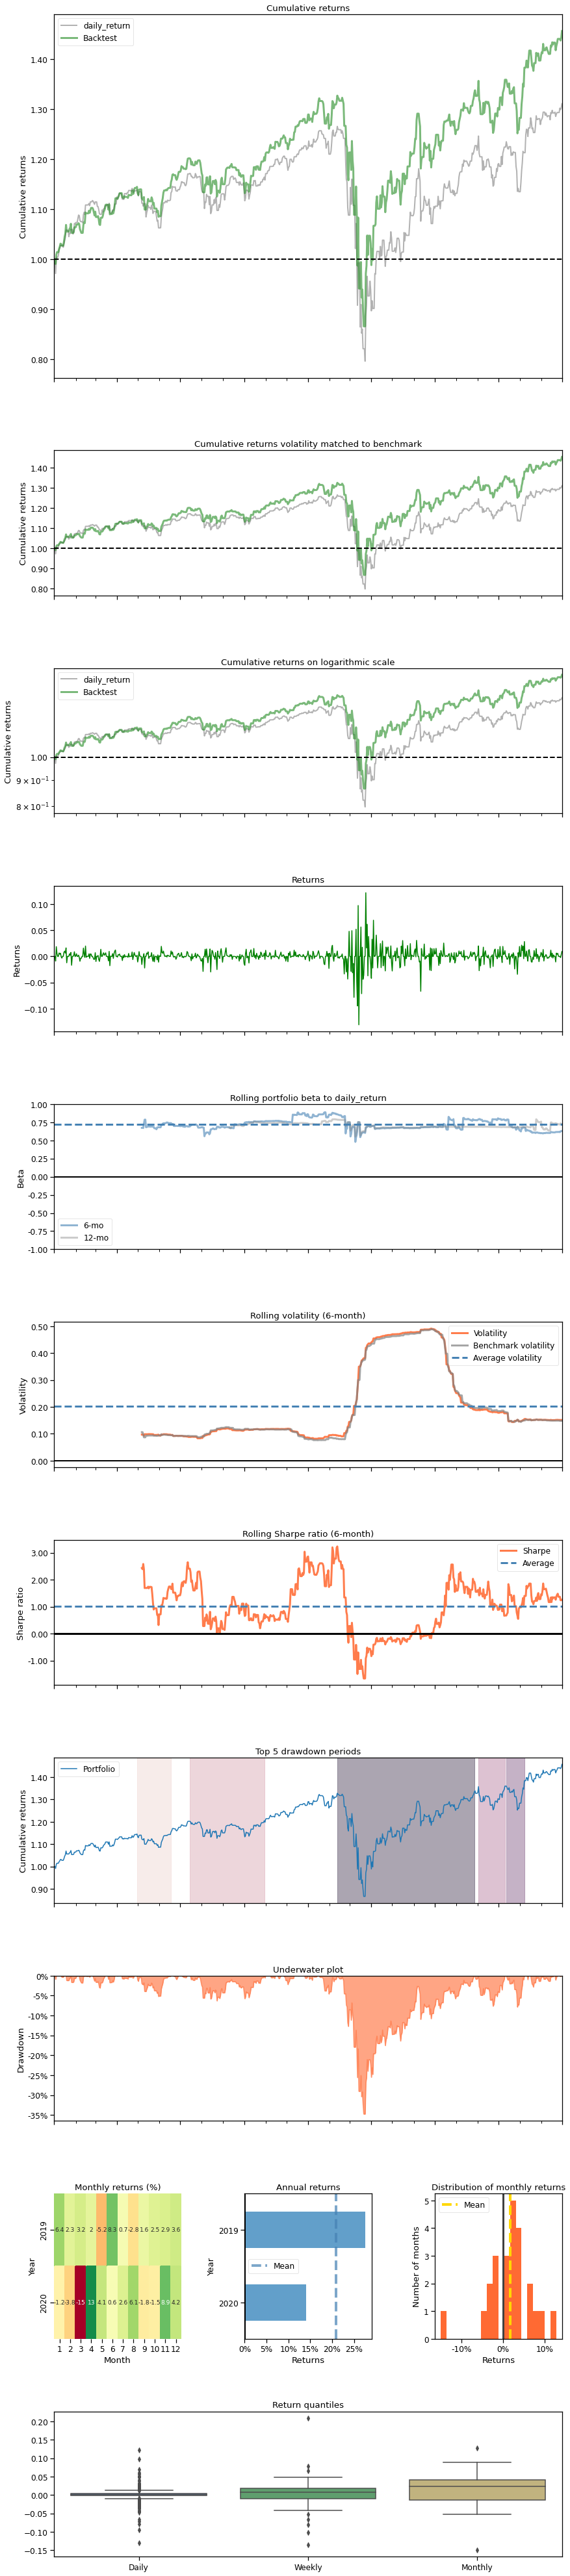

In [39]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value_ddpg, 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-01-01')